# Project 1 - Iowa Liquor 

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and wants a report of current liquor sales by county and projections for the rest of the year. 

Your task is as follows:

* Calculate the yearly liquor sales for each store using the provided data. You can add up the transactions for each year, and store sales in 2015 specifically will be used later as your target variable.
* Use the data from 2015 to make a linear model using as many variables as you find useful to predict the yearly sales of all stores. You must use the sales from Jan to March as one of your variables.
* Use your model for 2015 to estimate total sales in 2016, extrapolating from the sales so far for Jan-March of 2016.
* Report your findings, including any projected increase or decrease in total sales (over the entire state) for the tax committee of the Iowa legislature.
* Use cross-validation to check how your model predicts to held out data compared to the model metrics on the full dataset.
* Fit your model(s) using one or both of the regularization tactics covered. Explain whether the regularized or the non-regularized model performed better and what the selected regression(s) are doing.



# Part 1

### Data Cleaning and EDA

In Part 1 of this two-part project, you will apply the skills you have learned manipulating data in Python with Pandas, Numpy, Matplotlib, Seaborn and other tools to import the Iowa Liquor data, clean the dataset, then perform exploratory analysis using visual and statistical methods.

### Requirements:

**Identify the problem**
- Write a high quality problem statement
- Describe the goals of your study and criteria for success

**Acquire and clean the data**
- Verify the dataset is in the 'Assets' folder of this project - the data is from [Iowa.gov](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), filtered and
reduced
- Import data using the Pandas Library
- Format, clean, slice, and combine the data in Python

**Explore the data**
- Perform exploratory analysis methods with visualization and statistical analysis
- Determine outliers, skew distribution of important variables (if any)
- Determine correlations / causations in the data
- State the risks and assumptions of your data
- Identify 5 relationships, trends, or other intersting attributes of the data set

# Identify the Problem

The goal of this two-part project is to build a model predicting future sales. Write a problem statement and identify SMART goals 

### Problem Statement

Using the Iowa Liquor Sales data from Iowa.gov, and specifically the 2015 sales data for individual products by store, create a linear model to predict the total sales by store in 2016 given the Jan-Mar 2016 sales data. These predictions will inform the Iowa tax committee's decisions on potential liquor tax reform.

### SMART Goals

Through this analysis, we will accomplish the tasks of reporting current liquor sales by county and projections for the rest of the year as requested by the Iowa tax board.
We will use liquor sales data by county for 2015 as well as the first quarter of 2016 to project the rest of 2016. We are assuming a similar operating environment in 2016 (i.e. the same stores are in operation, the same liquors can be purchased, etc.).
We will perform exploratory data analysis to determine associations / correlations / causations in our data and let those inform our linear model. The effectiveness of our analysis will be reflected in the accuracy of our prediction for the 2016 total liquor sales by county and store.

# Download Data



If you navigate to the [data.iowa.gov](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) page for the liquor sales data and click "download" - you'll end up with a 3.4GB/12.6 million row file containing all transactions by product for every class-E liquor store in the state since January 1, 2012

For this project, we are providing a trimmed version of this dataset which contains a sample of the data. If you would like to try using a larger sample of the data, reach out to John or Joseph


** The folowing code verifies that the dataset is in the right location **

If the code below returns 'false' - reach out to your instructors.

In [377]:
import os
import pandas as pd
os.path.isfile('../Assets/Iowa_Liquor_sample.csv') 

True

In [235]:
# liquor=pd.read_csv('../Assets/Iowa_Liquor_sample.csv')

In [236]:
# liquor['State Bottle Cost'] = liquor['State Bottle Cost'].apply(lambda x: x.replace('$',''))
# liquor['State Bottle Retail'] = liquor['State Bottle Retail'].apply(lambda x: x.replace('$',''))
# liquor['Sale (Dollars)'] = liquor['Sale (Dollars)'].apply(lambda x: x.replace('$',''))

# liquor['State Bottle Cost'] = pd.to_numeric(liquor['State Bottle Cost'],errors='coerce')
# liquor['State Bottle Retail'] = pd.to_numeric(liquor['State Bottle Retail'],errors='coerce')
# liquor['Sale (Dollars)'] = pd.to_numeric(liquor['Sale (Dollars)'],errors='coerce')

# Load Data and Clean

Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [378]:
import pandas as pd

## Load the data into a DataFrame
liquor = pd.read_csv('../Assets/Iowa_Liquor_sample.csv')


### Explore the head and tail

View the head and tail of the data set; take a look at the columns. 

Can you identify what each of the columns are describing? 

How many rows / columns are there in the dataset?

In [379]:
# .head()

liquor.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [380]:
# .tail()
liquor.tail()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
270950,12/22/2015,4057,DES MOINES,50316,77.0,Polk,1022100.0,TEQUILA,410,88291,Patron Tequila Silver Mini,300,$20.30,$30.45,4,$121.80,1.20,0.32
270951,11/04/2015,5151,IDA GROVE,51445,47.0,Ida,1011200.0,STRAIGHT BOURBON WHISKIES,259,17956,Evan Williams Str Bourbon,750,$7.47,$11.21,3,$33.63,2.25,0.59
270952,10/20/2015,5152,WATERLOO,50702,7.0,Black Hawk,1011300.0,TENNESSEE WHISKIES,85,26826,Jack Daniels Old #7 Black Lbl,750,$15.07,$22.61,6,$135.66,4.50,1.19
270953,11/20/2015,3562,WEST BURLINGTON,52655,29.0,Des Moines,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65258,Jagermeister Liqueur,1750,$26.05,$39.08,6,$234.48,10.50,2.77
270954,01/27/2015,4446,URBANDALE,50322,77.0,Polk,1031080.0,VODKA 80 PROOF,260,37993,Smirnoff Vodka 80 Prf,200,$2.75,$4.13,8,$33.04,1.60,0.42


In [381]:
# .shape
liquor.shape

(270955, 18)

### Parse dates

Using '.dtypes' on our dataframe allows us to view the data type of each of our collumns. Pandas does its best to infer data types on ingest, but we may still need to make assumptions. [Pandas Dtype Basics](https://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)

In [382]:
# use .dtypes on the liquor dataframe to view the data type of each column
liquor.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

Note that the 'Date' column has the dtype 'object' - this is the pandas data type designation for a string or a data type it doesn't recognise. 

We want our 'Date' column to be interpreted as datatime by pandas so we can perform time-based grouping and other functions on this column, so we have to convert it to a datetime datatype.

Pandas gives us some options:
- Adjust our pd.read_csv to infer datetimes on import
- Directly convert the date column

[Pandas pd.read_csv datetime handling documentation](https://pandas.pydata.org/pandas-docs/stable/io.html#datetime-handling)

[Pandas pd.to_datetime documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

In [383]:
# Option 1: adjust pd.read_csv
# df = pd.read_csv('file.csv',parse_dates=['date column'],infer_datetime_format=True)
# liquor = pd.read_csv('../Assets/Iowa_Liquor_sample.csv', parse_dates=['Date'],infer_datetime_format=True)

In [384]:
# Option 2: convert the 'Date' column
# df["Date"] = pd.to_datetime(df["Date"],errors='coerce',infer_datetime_format=True)
liquor['Date'] = pd.to_datetime(liquor['Date'],errors='coerce',infer_datetime_format=True)

In [385]:
# check .dtypes agin
liquor.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost                object
State Bottle Retail              object
Bottles Sold                      int64
Sale (Dollars)                   object
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

### Clean Column Names

Are there spaces in the column names? When columns have spaces in there name, it makes it difficult to use pandas in the form of df.column.method() (ie, liquor.City.value_counts)

For a multi-word column name, you would have to use df['Zip Code'] instead of df.ZipCode

Additionally, some of our columns have parantheses in their names. 

We can remove spaces and special characters from our columns, which will help keep our code clean.

In [386]:
# view  column names
# df.columns.values
liquor.columns.values

array(['Date', 'Store Number', 'City', 'Zip Code', 'County Number',
       'County', 'Category', 'Category Name', 'Vendor Number',
       'Item Number', 'Item Description', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'], dtype=object)

In [387]:
# remove spaces
# df.columns = df.columns.str.replace(' ','')
liquor.columns = liquor.columns.str.replace(' ','')


In [388]:
# remove both left and right parentheses
# df.columns = df.columns.str.replace('(','')
liquor.columns = liquor.columns.str.replace('(', '')
liquor.columns = liquor.columns.str.replace(')', '')


### Clean Numerics

Look at the .dtypes and the .head() of the dataframe again - are there any columns that should be a numeric data type (float, int, etc) that are still objects? (hint - follow the $money)

[Pandas Series.replace()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.replace.html)

[Pandas pd.to_numeric()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_numeric.html)

In [389]:
# remove characters from a series of strings/objects
# df['column'] = df['column'].replace(...)
liquor['StateBottleCost'] = liquor['StateBottleCost'].apply(lambda x: x.replace('$', ''))
liquor['StateBottleRetail'] = liquor['StateBottleRetail'].apply(lambda x: x.replace('$', ''))
liquor['SaleDollars'] = liquor['SaleDollars'].apply(lambda x: x.replace('$', ''))


In [390]:
# convert string/object columns to numeric
# df['column'] = pd.to_numeric(df['column'], errors='coerce')
liquor.StateBottleCost = pd.to_numeric(liquor.StateBottleCost, errors='coerce')
liquor.StateBottleRetail = pd.to_numeric(liquor.StateBottleRetail, errors='coerce')
liquor.SaleDollars = pd.to_numeric(liquor.SaleDollars, errors='coerce')


In [391]:
# examine your .dtypes and .head() to confirm your type adjustements
liquor.head()

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55


### Null Values

Evaluate the null values in the dataset. 

Questions to guide your process:
- What columns have null values?
- How many nulls values are in each column?
- Will the missing values effect your analysis? 
- Can you afford to remove (drop) the null values from your dataset?

[df.isnull()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html)

[df.dropna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

[O'Reilly article on dealing with nulls using pandas](https://www.oreilly.com/learning/handling-missing-data)

[Data School video on missing values in pandas](https://www.youtube.com/watch?v=fCMrO_VzeL8)

So I tried in vain to find a way to fill the null values. I didn't want to drop them because I know some of the store numbers are all NA for County which would affect both the county analysis and the store analysis. That also meant that I couldn't just do ffill because there were some stores that didn't actually have any valid values to fill down. I considered doing a filter by city and then fillna() but ran into chained indexing issues. I will continue to try to fix these null values, and may resort to just going by city and filling that way but was hoping to avoid that manual effort.
Oddly, almost every store number in the 5000s has no county or county number data.

In [392]:
# your code here

liquor.groupby('StoreNumber').CategoryName.value_counts()
liquor.groupby('StoreNumber').count()

,Date,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
StoreNumber,,,,,,,,,,,,,,,,,
2106,654,654,654,654,654,654,652,654,654,654,654,654,654,654,654,654,654
2113,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184,184
2130,509,509,509,509,509,509,508,509,509,509,509,509,509,509,509,509,509
2152,171,171,171,161,161,171,171,171,171,171,171,171,171,171,171,171,171
2178,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295,295
2190,1626,1626,1626,1626,1626,1626,1615,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626
2191,739,739,739,739,739,739,739,739,739,739,739,739,739,739,739,739,739
2200,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485
2205,288,288,288,288,288,287,287,288,288,288,288,288,288,288,288,288,288


In [393]:
# liquor.isnull().sum()
liquor[liquor.CountyNumber.isnull()].StoreNumber.value_counts()
# sortedliquor = liquor.sort_values(['StoreNumber','County'])
# sortedliquor[sortedliquor.StoreNumber == 3820]
# use an at function to set individual values
# liquor.at[198,'CountyNumber'] = 'NaN'

# using ffill, 'forward fill', will propogate the last valid observation forward until the next valid
# df.fillna(method='ffill')

4247    153
3820     83
5210     80
5230     65
2637     64
2460     64
5220     61
5236     49
3632     40
5222     33
4307     31
3682     28
5227     27
4222     23
2353     23
4203     23
2650     23
5224     20
4214     14
3591     14
5225     14
4308     13
4169     13
5226     13
5214     12
3747     11
2152     10
2238      9
5247      7
5240      7
4006      6
5217      6
5237      6
5229      5
5232      4
5233      4
5208      4
3826      4
5234      3
5223      3
5216      3
5218      2
Name: StoreNumber, dtype: int64

In [394]:
replaced = sortedliquor.County.fillna(method='ffill',limit=200)
print(replaced.isnull().sum())
sortedliquor.isnull().sum()

132


Date                    0
StoreNumber             0
City                    0
ZipCode                 0
CountyNumber         1077
County               1077
Category               68
CategoryName          632
VendorNumber            0
ItemNumber              0
ItemDescription         0
BottleVolumeml          0
StateBottleCost         0
StateBottleRetail       0
BottlesSold             0
SaleDollars             0
VolumeSoldLiters        0
VolumeSoldGallons       0
dtype: int64

In [395]:
liquor[liquor.CountyNumber.isnull()].City.value_counts()
# liquor.City.value_counts()
# sortedliquor = liquor.sort_values(['StoreNumber','County'])
# sortedliquor[sortedliquor.City == 'CEDAR RAPIDS'].StoreNumber.value_counts()

BELMOND          153
CEDAR RAPIDS     110
SIOUX CITY        83
CLARINDA          80
DAVENPORT         77
HAMPTON           64
MASON CITY        61
ANAMOSA           49
DUBUQUE           43
CORALVILLE        33
DUNLAP            31
WESLEY            28
CLINTON           27
WAVERLY           23
CRESCO            23
EVANSDALE         23
HARLAN            23
ROCKWELL          17
ACKLEY            14
NORTH LIBERTY     14
WATERLOO          14
DES MOINES        13
SIGOURNEY         11
ALTOONA            9
WEST BRANCH        7
LARCHWOOD          6
SEYMOUR            6
FORT DODGE         6
NORWALK            5
PLEASANTVILLE      4
ATLANTIC           4
OSCEOLA            4
AUDUBON            4
TABOR              3
RUNNELLS           3
CHARITON           2
Name: City, dtype: int64

In [396]:
# liquor[liquor.City == 'CHARITON'].County.fillna(value='Lucas',inplace=True)
# liquor[liquor.CountyNumber.isnull()].City.value_counts()


## Exploratory Data Analysis

Using pandas (and other tools such as NumPy, Matplotlib, or Seaborn) explore the Iowa Liquor dataset.

**Remember** Your goal in Part 2 will be to predict future sales. Look for relationships, trends, and features that may assist you in that task.

### Identify 5 trends, relationships, or things that stand out to you in the dataset

Display yout findings below

In [397]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### Some questions to get you started:

 - What categories had the highest number of sales?
 - What categories had the highest sales in dollars?
 - Are there any strong relationships between any of the features and sales (in dollars)?
 - Are there any outliers? Are there any individual sales, stores, locations, or categories that show strange behavior?
 - What categories are the most profitable?
 - What stores are the most profitable?
 
 


** Example ** 

Relationship between mean Bottles Sold and average SaleDollars (by store)

There is a strong possitive relationship between the average number of bottles sold per transaction at a store and the average total sale amount per transaction at the same store. 

Digging deeper, by comparing BottlesSold to StateBottleRetai we can see that there is almost no relationship between the average bottle price per transaction at a store and the average number of bottles sold per transaction; that is stores which are selling more bottles per transaction are not nescesarily selling cheaper items, and stores that are selling less bottles are not selling more expensive items.


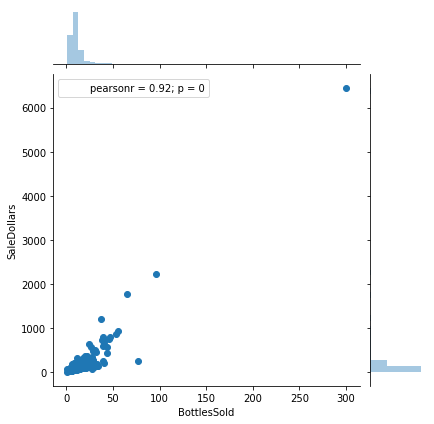

In [398]:
# graphing relationship between mean Bottles Sold per store and mean Sale total per store
# seaborn's jointplot provides a scatter of my variables, histograms, and a pearson correlation coefficient

liquor_grouped_mean = liquor.groupby('StoreNumber').mean()

sns.jointplot(x='BottlesSold',y='SaleDollars',data=liquor_grouped_mean)
plt.show()

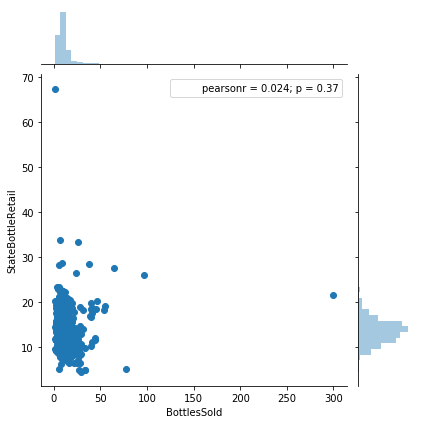

In [399]:
# graphing relationship between mean Bottles Sold per store and mean Bottle Retail price per store
sns.jointplot(x='BottlesSold',y='StateBottleRetail',data=liquor_grouped_mean)
plt.show()

count    1400.000000
mean       13.638091
std         3.314978
min         4.515000
25%        11.663636
50%        13.551636
75%        15.225041
max        67.490000
Name: StateBottleRetail, dtype: float64

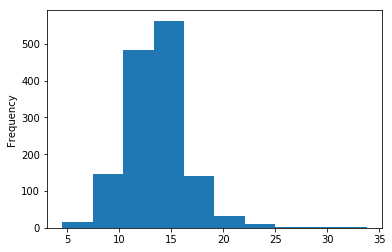

In [400]:
# histogram of average bottle retail price
liquor_grouped_mean[liquor_grouped_mean.StateBottleRetail <= 50].StateBottleRetail.plot(kind='hist')

liquor_grouped_mean.StateBottleRetail.describe()

### Finding #1

What stores were the most profitable?

After aggregating all the sales by store, there were two stores that appear to be outliers in terms of SaleDollars.

Upon further investigation, these stores were both in Des Moines, Iowa's most heavily populated city. Intuitively, this makes sense to me, and I wonder whether there is a relationship between how big the city is and the sales totals for the stores in that city. I would also point out that we are not looking at a very normal distribution for Sales Dollars.

In [401]:
# looking at highest and lowest grossing stores
liquor_grouped_sum = liquor.groupby('StoreNumber').sum()
liquor_grouped_sum.drop(['CountyNumber','Category','VendorNumber','ItemNumber','BottleVolumeml','StateBottleRetail','StateBottleCost'],axis=1,inplace=True)
liquor_grouped_sum.sort_values(by='SaleDollars', ascending=False)

,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
StoreNumber,,,,
2633,76756,1220335.09,75921.50,20057.78
4829,65719,1089152.87,63484.99,16772.70
2512,35679,532265.62,33397.94,8823.47
3385,31737,506589.09,36232.50,9571.80
3420,23784,402576.06,28656.00,7570.33
3952,22754,392451.43,21745.26,5745.27
3814,13388,310536.40,16252.50,4293.54
3773,16899,298663.20,16198.82,4278.67
3354,17961,295593.30,21279.75,5621.65


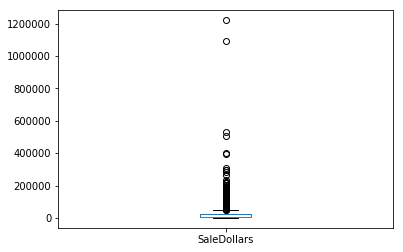

In [402]:
# box plot showing the distribution of the sales dollars, which is very skewed by the top two stores
liquor_grouped_sum.SaleDollars.plot(kind='box')

In [403]:
liquor[liquor.StoreNumber == 2633]

,Date,StoreNumber,City,ZipCode,CountyNumber,County,Category,CategoryName,VendorNumber,ItemNumber,ItemDescription,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons
39,2016-03-07,2633,DES MOINES,50320,77.0,Polk,1011200.0,STRAIGHT BOURBON WHISKIES,461,22157,Wild Turkey 101,1000,16.16,24.24,12,290.88,12.00,3.17
130,2016-03-14,2633,DES MOINES,50320,77.0,Polk,1081700.0,DISTILLED SPIRITS SPECIALTY,381,27372,American Born Moonshine Original,750,12.50,18.75,1,18.75,0.75,0.20
137,2015-12-17,2633,DES MOINES,50320,77.0,Polk,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,55,44217,Barton Rum Light,1000,4.00,6.00,36,216.00,36.00,9.51
164,2015-09-10,2633,DES MOINES,50320,77.0,Polk,1031200.0,VODKA FLAVORED,380,41705,Uv Red (cherry) Vodka,1000,7.50,11.25,24,270.00,24.00,6.34
236,2015-01-15,2633,DES MOINES,50320,77.0,Polk,1012100.0,CANADIAN WHISKIES,65,10846,Canadian Club Small Batch Classic,750,13.12,19.68,1,19.68,0.75,0.20
351,2015-03-23,2633,DES MOINES,50320,77.0,Polk,1081700.0,DISTILLED SPIRITS SPECIALTY,421,77487,Tortilla Gold Dss,1000,4.51,6.77,240,1624.80,240.00,63.40
369,2015-05-22,2633,DES MOINES,50320,77.0,Polk,1081390.0,IMPORTED SCHNAPPS,421,69637,Dr. Mcgillicuddy's Cherry Schnapps,1000,11.00,16.50,12,198.00,12.00,3.17
378,2015-11-19,2633,DES MOINES,50320,77.0,Polk,1041100.0,AMERICAN DRY GINS,380,31719,Phillips Gin,1000,4.38,6.57,36,236.52,36.00,9.51
499,2015-02-02,2633,DES MOINES,50320,77.0,Polk,1012100.0,CANADIAN WHISKIES,55,12407,Canadian Ltd Whisky,1000,5.50,8.25,12,99.00,12.00,3.17
839,2015-11-30,2633,DES MOINES,50320,77.0,Polk,1012200.0,SCOTCH WHISKIES,260,10009,Scoresby Rare Scotch,1000,6.74,10.11,12,121.32,12.00,3.17


### Finding #2

Highest selling categories.

Canadian Whiskies and Vodka 80 Proof are far and away the most profitable Categories. Overall there are about 8 outlier Categories when looking at the box plot of Sales by Category.
What is difficult to determine is whether that finding applies more broadly to whiskey and vodka of varying subcategories. But it might be worth keeping in mind that it appears Iowans spend a lot of money on these two categories especially.

In [404]:
# group the sales by category name and determine which ones are the most profitable
liquor_grouped_cat = liquor.groupby('CategoryName').sum()
liquor_grouped_cat.drop(['VendorNumber','Category','StoreNumber','ItemNumber','StateBottleCost','StateBottleRetail','VolumeSoldGallons','CountyNumber'],axis=1,inplace=True)
liquor_grouped_cat.sort_values(by='SaleDollars', ascending=False)

,BottleVolumeml,BottlesSold,SaleDollars,VolumeSoldLiters
CategoryName,,,,
CANADIAN WHISKIES,26211875,324049,4408768.86,337484.79
VODKA 80 PROOF,37034225,517504,4208811.41,496240.08
SPICED RUM,14240750,178303,2727704.47,177195.07
IMPORTED VODKA,9699350,101680,2079010.43,97416.76
STRAIGHT BOURBON WHISKIES,13961100,111483,1923907.85,102390.50
TEQUILA,9229875,113300,1886724.18,92889.61
WHISKEY LIQUEUR,11848400,134824,1797053.44,107029.46
TENNESSEE WHISKIES,5314175,72583,1598605.37,57697.15
PUERTO RICO & VIRGIN ISLANDS RUM,10906225,92110,1046370.81,99956.72


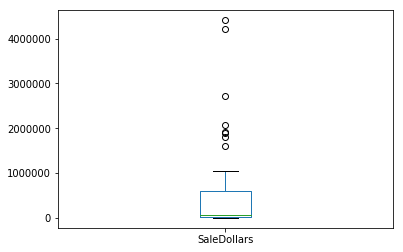

In [405]:
liquor_grouped_cat.SaleDollars.plot(kind='box')

### Finding #3

Relationship between price per liter and total sales.

I was hoping to determine if there was any relationship between price/liter for alcohol categories and volume sold for that category. My guess would be that there would be at least a small relationship where relatively cheaper liquors would sell more volume.

However, outside of a couple of outliers in vodka 80 proof and blended whiskies, there doesn't seem to be much effect on volume by price until you get up over about $40/liter.

In [406]:
# create a Price column to calculate the average price per liter of each category
liquor_grouped_cat['Price'] = liquor_grouped_cat.SaleDollars / liquor_grouped_cat.VolumeSoldLiters
liquor_grouped_cat.sort_values(by='SaleDollars', ascending=False)

,BottleVolumeml,BottlesSold,SaleDollars,VolumeSoldLiters,Price
CategoryName,,,,,
CANADIAN WHISKIES,26211875,324049,4408768.86,337484.79,13.063608
VODKA 80 PROOF,37034225,517504,4208811.41,496240.08,8.481402
SPICED RUM,14240750,178303,2727704.47,177195.07,15.393794
IMPORTED VODKA,9699350,101680,2079010.43,97416.76,21.341404
STRAIGHT BOURBON WHISKIES,13961100,111483,1923907.85,102390.50,18.789906
TEQUILA,9229875,113300,1886724.18,92889.61,20.311466
WHISKEY LIQUEUR,11848400,134824,1797053.44,107029.46,16.790269
TENNESSEE WHISKIES,5314175,72583,1598605.37,57697.15,27.706834
PUERTO RICO & VIRGIN ISLANDS RUM,10906225,92110,1046370.81,99956.72,10.468239


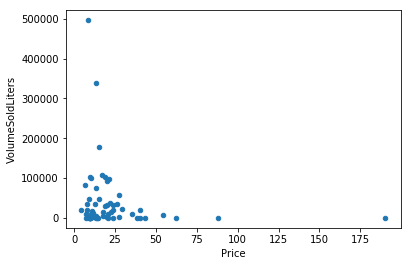

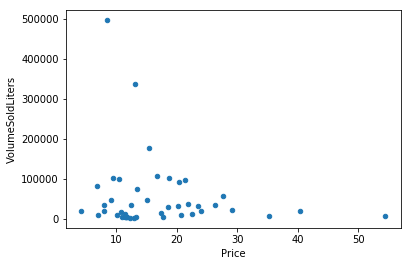

In [407]:
# graph the relationship between Volume sold and price per liter of volume
liquor_grouped_cat.plot(kind='scatter',x='Price',y='VolumeSoldLiters')
liquor_grouped_cat[liquor_grouped_cat.BottlesSold > 3000].plot(kind='scatter',x='Price',y='VolumeSoldLiters')

### Finding #4

Relationship between SaleDollars and average Profit Margin by store

There doesn't appear to be a strong correlation between average margin at a store and the total sale dollars at that store. 

People are not spending noticeably more or less at stores that have higher average margins, in general. Roughly 50% seems like a pretty reasonable estimate for the average margin on each item. Most of the stores operated within a 50-52% profit margin but I found it interesting that only two of them were below 50%.

In [408]:
# create a dataframe that measures the average profit margin and total sales by store
margin = liquor
margin['ProfitMargin'] = (margin.StateBottleRetail - margin.StateBottleCost)/margin.StateBottleCost
total_sales = margin.groupby('StoreNumber').SaleDollars.sum()
avg_margin = margin.groupby('StoreNumber').ProfitMargin.mean()
margin_analysis = pd.DataFrame()
margin_analysis['avg_margin'] = avg_margin
margin_analysis['total_sales']= total_sales
margin_analysis.head(20)

,avg_margin,total_sales
StoreNumber,,
2106,0.501707,176849.97
2113,0.501395,11376.12
2130,0.500862,139727.54
2152,0.504160,9097.51
2178,0.503065,29912.68
2190,0.501646,156204.75
2191,0.500474,172431.69
2200,0.501516,26986.42
2205,0.502405,24681.39


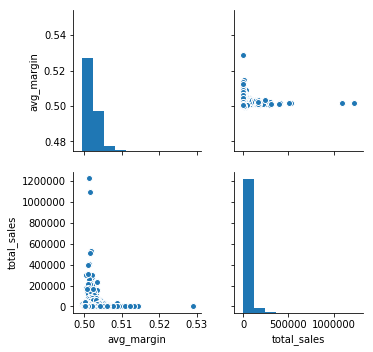

In [409]:
# graph the relationship between sales by store and average margin by store
sns.pairplot(margin_analysis)

In [410]:
margin.groupby('StoreNumber').mean().sort_values(by='ProfitMargin')


,CountyNumber,Category,VendorNumber,ItemNumber,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,ProfitMargin
StoreNumber,,,,,,,,,,,,
3678,77.0,1.038738e+06,258.639785,59053.887097,939.381720,12.085806,18.124032,9.446237,112.753871,6.903065,1.823925,0.499402
5116,94.0,1.053584e+06,263.713656,44110.378855,849.008811,9.062115,13.588899,9.819383,79.380396,5.405419,1.428414,0.499631
9018,31.0,1.062310e+06,207.000000,46686.000000,750.000000,14.300000,21.450000,300.000000,6435.000000,225.000000,59.440000,0.500000
5192,57.0,1.056550e+06,290.500000,58265.500000,750.000000,7.240000,10.860000,5.500000,61.800000,4.125000,1.090000,0.500000
5233,NaN,1.057012e+06,245.000000,64679.250000,812.500000,8.700000,13.050000,5.250000,71.212500,4.312500,1.135000,0.500000
5218,NaN,1.056256e+06,222.500000,62387.500000,750.000000,6.400000,9.600000,1.000000,9.600000,0.750000,0.200000,0.500000
5139,7.0,1.037704e+06,250.000000,64710.000000,380.000000,8.636000,12.954000,28.800000,264.096000,8.340000,2.204000,0.500000
5189,77.0,1.039636e+06,254.200000,36194.000000,1350.000000,10.450000,15.676000,8.400000,134.520000,9.900000,2.614000,0.500091
5223,NaN,1.035500e+06,235.666667,34550.666667,625.000000,13.203333,19.806667,5.000000,109.060000,3.373333,0.893333,0.500092


### Finding #5
(I'll come back to this one, so I put a sixth finding below)

Is there seasonality in liquor sales?

I need to nail down this finding because it will be crucial for the model building and assumptions for part 2 since we are basing our predictions heavily on the first three months of data for 2016.

There is definitely a seasonality to the liquor sales, but I need to figure out how to smooth the line out to actually draw some good conclusions from the chart. The days when zero liquor was sold make the chart look more erratic, and so does having it based on individual datetime values.

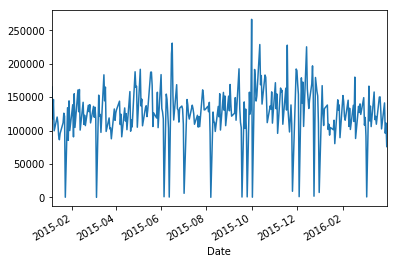

In [411]:
# determine the effect of month/season on liquor sales
liquor.groupby('Date').SaleDollars.sum().plot(kind='line')

### Finding #6

Most popular (by sale dollars) item at each store.

I'm not sure yet how it will help inform the 2016 total sales predictions, but I was interested in determining the most common purchases at each store. Unsurprisingly (based on finding #3), there were a lot of whiskies and vodkas near the top of the list. 

Maybe I could use the most popular liquor purchased at each store as the baseline for what that store would gross the following year? But I think that the most consistent way to establish a conservative baseline estimate would be using the previous year's data for average dollar amount per transaction.

In [412]:
# determine the most popular item (in sales) at each store

liquor_by_item = liquor.drop('CountyNumber', axis=1)
# liquor_by_item.groupby('StoreNumber').ItemDescription.value_counts()
# liquor_by_item.loc[liquor_by_item.reset_index().groupby(['StoreNumber'])['SaleDollars'].idxmax()]
most_popular_item = liquor.groupby(['StoreNumber','ItemDescription']).size().reset_index().groupby('ItemDescription')[[0]].max()

In [413]:
# I grouped by store number and then by item within that store and returned the sum of the sales by item
most_popular_item = liquor.groupby(['StoreNumber','ItemDescription']).sum().reset_index().groupby('StoreNumber').max()
most_popular_item.head()

,ItemDescription,CountyNumber,Category,VendorNumber,ItemNumber,BottleVolumeml,StateBottleCost,StateBottleRetail,BottlesSold,SaleDollars,VolumeSoldLiters,VolumeSoldGallons,ProfitMargin
StoreNumber,,,,,,,,,,,,,
2106,Yukon Jack Canadian Liqueur,154.0,22266200.0,5052,1809126,26250,181.40,272.15,870,15232.32,874.5,231.01,11.170586
2113,Uv Orange Vodka,658.0,7154700.0,2870,618072,7000,189.00,283.50,78,983.88,85.5,22.59,3.500000
2130,Yukon Jack Jacapple,98.0,14169400.0,4210,902933,13950,167.00,250.51,732,12905.16,732.0,193.37,7.010928
2152,Windsor Canadian Pet,187.0,11341880.0,3472,395090,15250,107.72,161.58,120,1588.92,120.0,31.69,5.624205
2178,Yukon Jack Canadian Liqueur,30.0,10121000.0,1820,903878,12250,126.00,189.00,192,2106.00,165.6,43.76,5.084504


In [414]:
most_popular_item.ItemDescription.value_counts()

Windsor Canadian Pet                   184
Yukon Jack Canadian Liqueur            142
Uv Blue (raspberry) Vodka              121
Uv Red (cherry) Vodka                   74
Woodford Reserve Bourbon                52
Uv Cake Vodka                           46
Windsor Canadian                        46
Wild Turkey American Honey              45
Uv Vodka                                42
Wild Turkey 101                         40
Yukon Jack Perma Frost Schnapps         37
Southern Comfort                        32
Yukon Jack Jacapple                     30
UV Vodka PET                            26
Templeton Rye                           26
Wild Turkey 101 Round                   24
Titos Vodka                             24
Smirnoff Vodka 80 Prf                   23
Windsor Canadian Traveler               22
Viniq                                   22
Wild Turkey 101 Mini                    16
Smirnoff Vodka 80 Prf Mini              15
Windsor Canadian Supreme Whisky         15
Zaya Guatem